In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

## Setting the scene

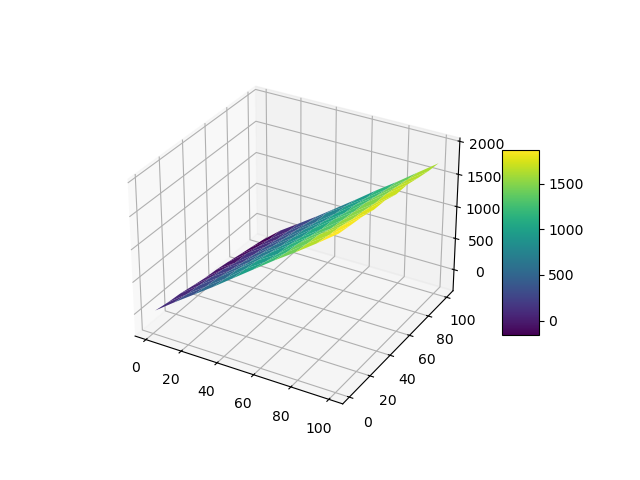

In [66]:
%matplotlib widget
np.random.seed(1)
N = 100  
a10 = 20
a20 = -3

XX = np.flipud(np.meshgrid(np.arange(1, N+1), np.arange(1, N+1))).reshape(2, -1).T
X1 = XX[:, 0]
X2 = XX[:, 1]

f0 = lambda x1, x2: a10 * x1 + a20 * x2
f = lambda x1, x2, r: a10 * x1 + a20 * x2 + r

R = np.random.normal(0, 10, N * N)
Y = np.array([f(x1, x2, r) for x1, x2, r in zip(X1, X2, R)])

A, B = np.meshgrid(np.linspace(1, N, N//10), np.linspace(1, N, N//10))
ff = lambda x1, x2: f(x1, x2, np.random.normal(0, 10))



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = np.array([ff(a, b) for a, b in zip(A.ravel(), B.ravel())]).reshape(A.shape)
surf = ax.plot_surface(A, B, Z, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

In [31]:
# Linear model function
def m1(ws, x):
    return ws[0] * x[0] + ws[1] * x[1]

def mse(ws, m, X, Y):
    N = len(X)
    err = 0
    for i in range(N):
        xi = X[i, :]
        yi = m(ws, xi)
        err += (Y[i] - yi) ** 2
    err /= N
    return err

def mse1(ws):
    return (mse(ws,m1,XX,Y))


In [33]:
inputs = 2
outputs = 1
limit = np.sqrt(6 / (inputs + outputs))

ws0 = np.random.uniform(-limit, limit, size=(inputs, 1))
ws0

array([[1.07168949],
       [0.96501769]])

In [35]:
mse1(ws0)

array([882849.93943578])

In [37]:
gradients1 = [
    lambda ws, x: x[0],
    lambda ws, x: x[1]
]

C:\Users\emadi\AppData\Local\Temp\ipykernel_27296\506523528.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.arange(min(a10, ws0[0]) - 10, max(a10, ws0[0]) + 10, 1),
C:\Users\emadi\AppData\Local\Temp\ipykernel_27296\506523528.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.arange(min(a20, ws0[1]) - 10, max(a20, ws0[1]) + 10, 1)


Elapsed time: 4.218350887298584


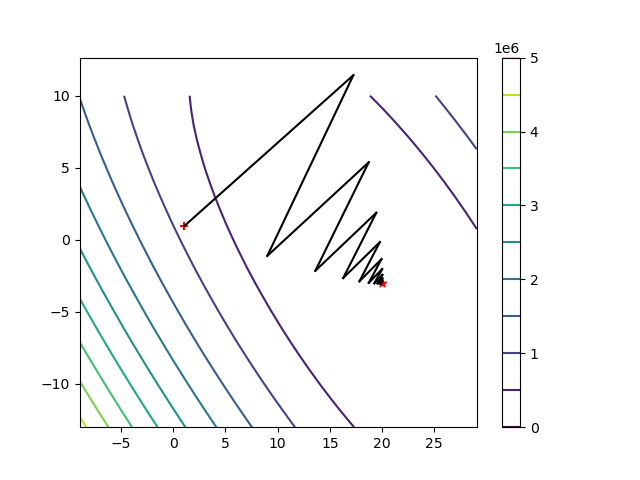

In [39]:
def grad_mse(ws, m, grads, X, Y):
    N = len(X)
    M = len(ws)
    grad_ws = np.zeros((M,1))
    for i in range(N):
        xi = X[i, :]
        yi = Y[i]
        tmp = yi - m(ws, xi)
        for j in range(M):
            grad_ws[j] = grad_ws[j] + tmp * grads[j](ws, xi)
    grad_ws = -2 / N * grad_ws
    return grad_ws


def grad_desc_mse(K, ws, learning_eps, loss, grad_loss, verbose=False):
    history = [loss(ws)]
    for k in range(K):
        grad_ws = grad_loss(ws)
        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws
        if verbose:
            plt.plot([old_ws[0], ws[0]], [old_ws[1], ws[1]], 'k-')
        history.append(loss(ws))
    return ws, history


A, B = np.meshgrid(
    np.arange(min(a10, ws0[0]) - 10, max(a10, ws0[0]) + 10, 1),
    np.arange(min(a20, ws0[1]) - 10, max(a20, ws0[1]) + 10, 1)
)

f = lambda a, b: mse1(np.array([a, b]))
Z = f(A, B)

# Plot the 3D contour
plt.figure()
contour = plt.contour(A, B, Z, levels=10, cmap='viridis')
plt.colorbar(contour)
plt.scatter(a10, a20, color='r', marker='*')
plt.scatter(ws0[0], ws0[1], color='r', marker='+')

grad_loss = lambda ws: grad_mse(ws, m1, gradients1, XX, Y)
K = 20
learning_eps = 0.00015


# Perform gradient descent
tic = time.time()
ws, history = grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss, True)
toc = time.time()
print("Elapsed time:", toc - tic)


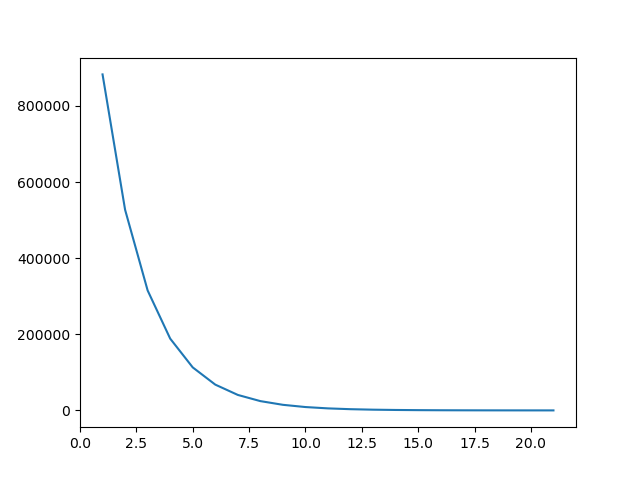

In [40]:
plt.figure()
plt.plot(range(1, len(history) + 1), history)

In [41]:
def stochastic_grad_desc_mse(K, ws, learning_eps, loss, grad_loss, N, verbose=False):
    batch_size = int(N * 0.01)
    history = [loss(ws)]
    
    for k in range(K):
        randices = np.random.choice(N, batch_size, replace=False)
        grad_ws = grad_loss(ws, randices)
        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws
        
        if verbose:
            plt.plot([old_ws[0], ws[0]], [old_ws[1], ws[1]], 'r-o')
        
        history.append(loss(ws))
    
    return ws, history

C:\Users\emadi\AppData\Local\Temp\ipykernel_27296\1745811106.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.arange(min(a10, ws0[0]) - 10, max(a10, ws0[0]) + 10, 1),
C:\Users\emadi\AppData\Local\Temp\ipykernel_27296\1745811106.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.arange(min(a20, ws0[1]) - 10, max(a20, ws0[1]) + 10, 1)


Elapsed time: 1.6654491424560547


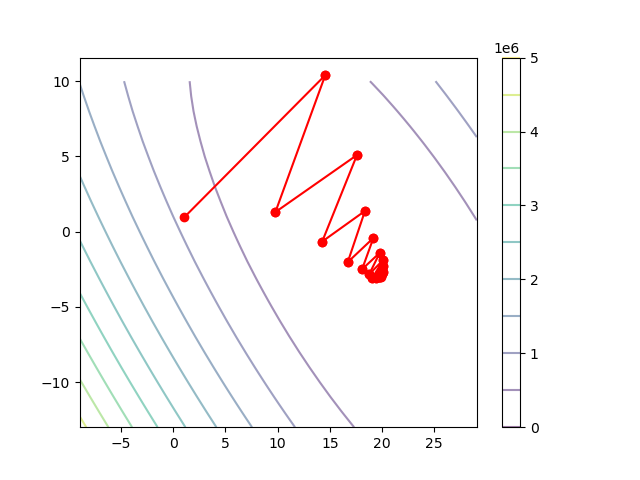

In [42]:
A, B = np.meshgrid(
    np.arange(min(a10, ws0[0]) - 10, max(a10, ws0[0]) + 10, 1),
    np.arange(min(a20, ws0[1]) - 10, max(a20, ws0[1]) + 10, 1)
)
f = lambda a, b: mse1(np.array([a, b]))
Z = f(A, B)

# Plot the 3D contour
plt.figure()
contour = plt.contour(A, B, Z, levels=10, cmap="viridis", alpha=0.5)
plt.colorbar(contour)
ax.scatter(a10, a20, mse1([a10, a20]), color='r', marker='*')
ax.scatter(ws0[0], ws0[1], mse1(ws0), color='r', marker='+')


grad_loss2 = lambda ws, randices: grad_mse(ws, m1, gradients1, XX[randices, :], Y[randices])


# Perform stochastic gradient descent
tic = time.time()
ws, history = stochastic_grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss2, N * N, True)
toc = time.time()
print("Elapsed time:", toc - tic)


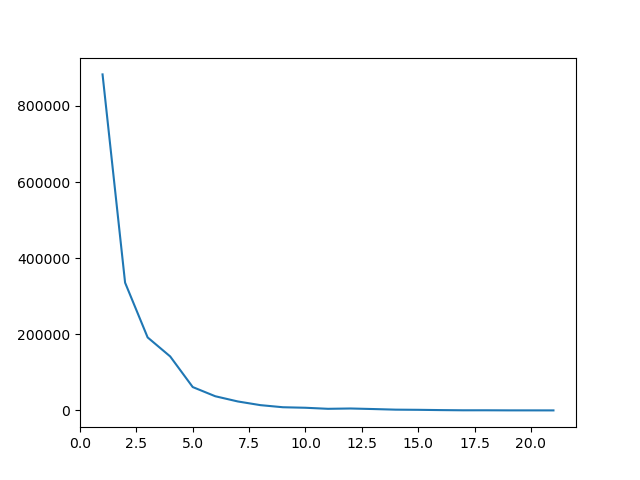

In [43]:
plt.figure()
plt.plot(range(1, len(history) + 1), history)

## SGD with momentum

In [45]:
def stochastic_momentum_grad_desc_mse(K, ws, learning_eps, loss, grad_loss, N, mass, verbose=False):
    batch_size = int(N * 0.01)
    history = [loss(ws)]
    v = np.zeros_like(ws)
    
    for k in range(K):
        randices = np.random.choice(N, batch_size, replace=False)
        grad_ws = grad_loss(ws, randices)
        v = (v + grad_ws) / 2
        old_ws = ws.copy()
        ws = old_ws - mass * v - learning_eps * grad_ws
        
        if verbose:
            plt.plot([old_ws[0], ws[0]], [old_ws[1], ws[1]], 'r-o')
        
        history.append(loss(ws))
    
    return ws, history


Elapsed time (SGD with Momentum): 1.6449589729309082


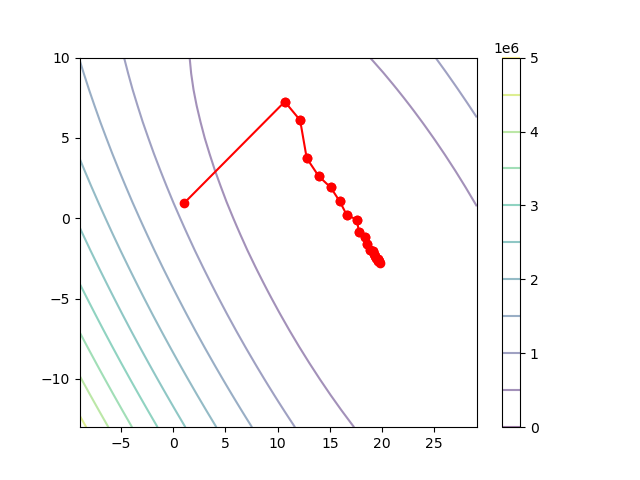

In [46]:
# Plot the 3D contour
plt.figure()
contour = plt.contour(A, B, Z, levels=10, cmap="viridis", alpha=0.5)
plt.colorbar(contour)
ax.scatter(a10, a20, mse1([a10, a20]), color='r', marker='*',s=70)
ax.scatter(ws0[0], ws0[1], mse1(ws0), color='r', marker='+',s=70)


# Hyper-parameters for the stochastic gradient descent with momentum
mass = 1/4 * 0.0001
learning_eps = 1/2 * 0.00015

# Perform stochastic gradient descent with momentum
tic = time.time()
ws, history = stochastic_momentum_grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss2, N * N, mass, True)
toc = time.time()
print("Elapsed time (SGD with Momentum):", toc - tic)


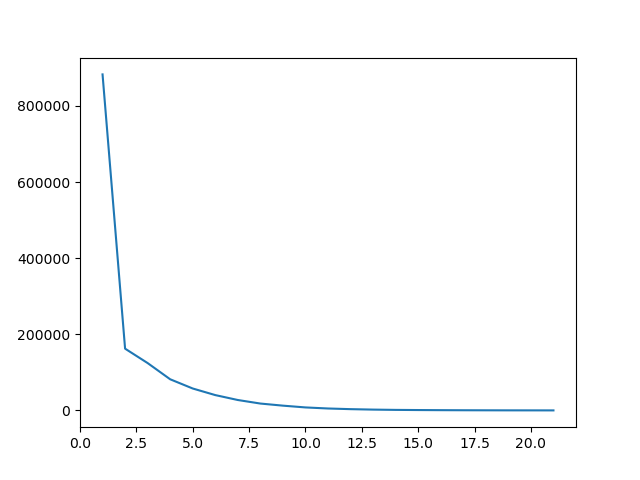

In [47]:
plt.figure()
plt.plot(range(1,len(history)+1),history)

## SGD with accumulated squared gradient: ADAM

In [52]:
def adam_mse(K, ws, learning_eps, loss, grad_loss, N, rho1, rho2, verbose=False):
    batch_size = int(N * 0.01)
    history = [loss(ws)]
    s = np.zeros_like(ws)
    r = np.zeros_like(ws)
    t = 0
    delta = 1e-10 * np.ones_like(ws)
    
    for k in range(K):
        randices = np.random.choice(N, batch_size, replace=False)
        grad_ws = grad_loss(ws, randices)
        old_ws = ws.copy()
        t += 1
        s = rho1 * s + (1 - rho1) * grad_ws
        r = rho2 * r + (1 - rho2) * grad_ws * grad_ws
        s_hat = s / (1 - rho1**t)
        r_hat = r / (1 - rho2**t)
        ws = old_ws - (learning_eps * s_hat) / (delta + np.sqrt(r_hat))
        
        if verbose:
            plt.plot([old_ws[0], ws[0]], [old_ws[1], ws[1]], 'r-o')
        
        history.append(loss(ws))
    
    return ws, history

Elapsed time:  1.6951408386230469


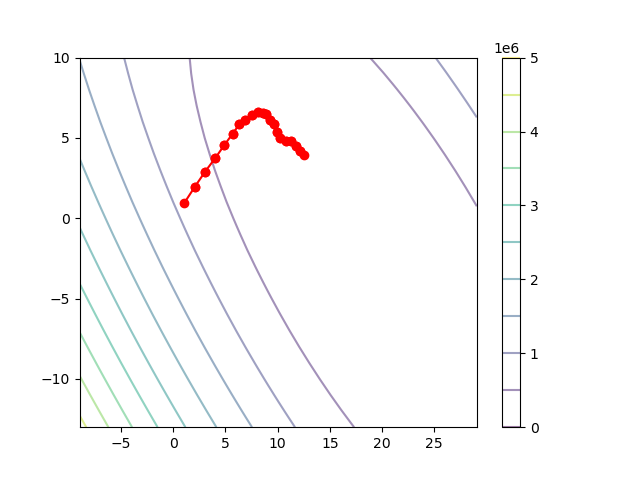

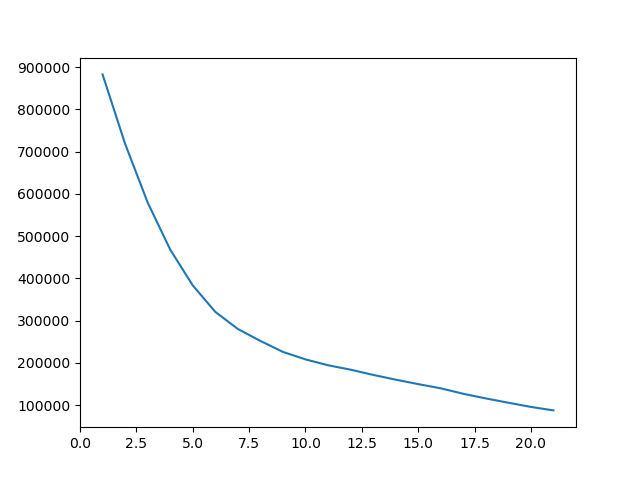

In [53]:
plt.figure()
contour = plt.contour(A, B, Z, levels=10, cmap="viridis", alpha=0.5)
plt.colorbar(contour)
ax.scatter(a10, a20, mse1([a10, a20]), color='r', marker='*',s=70)
ax.scatter(ws0[0], ws0[1], mse1(ws0), color='r', marker='+',s=70)


learning_eps = 0.99
rho1 = 0.3
rho2 = 0.9999

start_time = time.time()
ws, history = adam_mse(K, ws0, learning_eps, mse1, grad_loss2, N * N, rho1, rho2, True)
end_time = time.time()

print("Elapsed time: ",end_time-start_time)
# Plot the loss history for Adam with the best parameters
plt.figure()
plt.plot(range(1, len(history)+1), history)


## Discuss the result

### SGD with momentum
The search space plot displays the loss landscape with conture lines represent th diffrent loss valus.
From the plot we observe that the trajectory starts at higher loss region and then moves to lower loss regions wich indicates an effective optimization. The we observe that the path shows  intial rapid descent followed by smaller steps as it aprroches a minimum loss area.
The result from the loss history plot reveals a sharp intial decrease in loss, with the loss value approaching zero over time

### SGD with accumulated squared gradient: ADAM
The contour plot looks the similar with the SGD with momentum,but the pattern is diffrent, because it uses adpative learning rates to balance the speed and the stability.
Moving to the loss history, it starts with a huge decreasig in loss, followd by a gradual approch towards a minimum value. But as we see it does not converg towards zero as in less then 20 learning steps.